In [47]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt

In [48]:
def zero_mean_normalization(signal):
    """
    Normalizes a one-dimensional signal to have zero mean normalization.

    Gets:
    - One Dimensional signal

    Returns:
    - Zero mean normalized signal
    """
    signal = np.array(signal)  
    mean = np.mean(signal)     
    std = np.std(signal)
    
    # Zero-mean normalization: (signal - mean) / std
    normalized_signal = (signal - mean) / std
    
    return normalized_signal

In [49]:
# Load the CSV file
data_csv = pd.read_csv("./1_After_reconstruction.csv")

# Nan to zero
data_csv = data_csv.fillna(0)

# Assuming the data is in the first column
data_array = data_csv.iloc[:,1].values

In [50]:
# Zero mean normalization
data_array = zero_mean_normalization(data_array)

In [58]:
# Continuous Wavelet Transform (CWT)
scales = np.arange(1, 128)
wavelet = 'cmor1.5-1.0'

coefficients, frequencies = pywt.cwt(data_array, scales, wavelet)

# Extract the first 10 seconds of data
sampling_rate = 825  # Assuming a sampling rate of 1000 Hz (adjust if different)
first_10_seconds = data_array[:10 * sampling_rate]

# Perform CWT on the first 10 seconds of data
coefficients_10s, frequencies_10s = pywt.cwt(first_10_seconds, scales, wavelet)

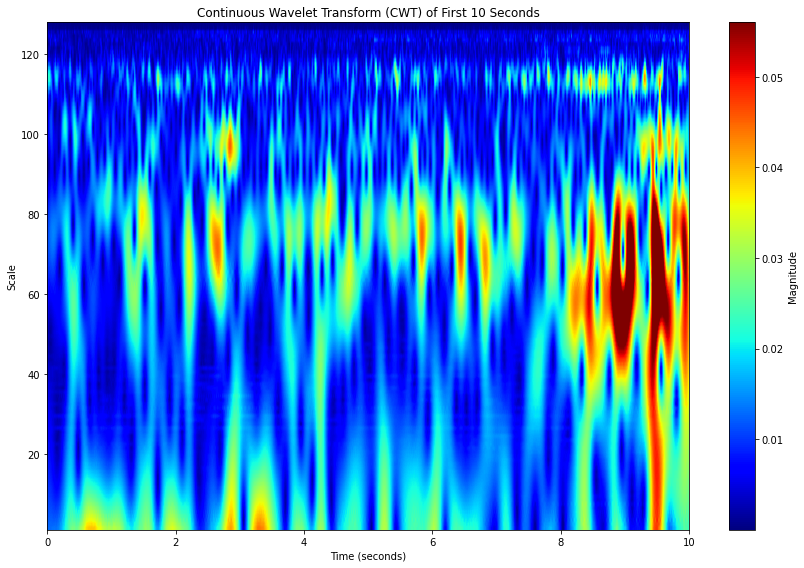

In [59]:
# Plot the CWT for the first 10 seconds
plt.figure(figsize=(12, 8))
plt.imshow(np.abs(coefficients_10s), extent=[0, 10, 1, 128], cmap='jet', aspect='auto',
           vmax=np.percentile(np.abs(coefficients_10s), 99))
plt.colorbar(label='Magnitude')
plt.title('Continuous Wavelet Transform (CWT) of First 10 Seconds')
plt.xlabel('Time (seconds)')
plt.ylabel('Scale')
plt.tight_layout()

# Showing the image
plt.show()
